# <span style='font-family:"Times New Roman"'>**CHURN PREDICTION**

<span style='font-family:"Roboto"'> Churn rate, also known as customer churn or attrition rate, shows the percentage of customers or subscribers who decide to stop interacting with a business, either by canceling their subscriptions or not renewing their contracts.

***

## <span style='font-family:"Roboto"'>**EXPLORATORY DATA ANALYSIS**

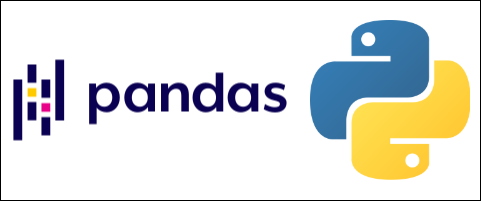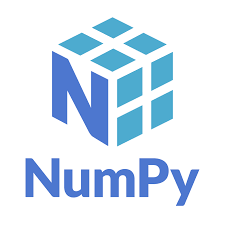

***

### <span style='font-family:"Roboto"'>**Data Preparation**

<span style='font-family:"Roboto"'> We will use Pandas to load the dataset into a dataframe, explore the different columns and ranges of values, handle missing values and incorrect datatypes, and generally prepare our data for analysis.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import matplotlib.ticker as mtick

##### <span style='font-family:"Roboto"'> Prepare data

<span style='font-family:"Roboto"'> We will load the dataset into Python to start performing EDA

In [6]:
df = pd.read_excel(r"C:\Users\RonaldOnyango\Desktop\Misc\BIA Assignment.xlsx", index_col='Identifier')

<span style='font-family:"Roboto"'> We will view the basic information about our data using df.info() and df.describe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142902 entries, 63697470ede7fa7e107227c5 to 5ef55d5747d3881a67765258
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       142901 non-null  object 
 1   gender            130577 non-null  object 
 2   age               141917 non-null  float64
 3   last active date  142902 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [4]:
df.describe()

,age
count,141917.000000
mean,25.119859
std,5.352209
min,18.000000
25%,22.000000
50%,24.000000
75%,27.000000
max,52.000000


<span style='font-family:"Roboto"'> At a glance, we already get an idea of top values per column 

In [5]:
df.columns

Index(['joined_date', 'gender', 'age', 'last active date'], dtype='object')

***

### <span style='font-family:"Roboto"'>**Data Cleaning**

<span style='font-family:"Roboto"'> **Find Null Values**

In [7]:
df['joined_date'].isna().value_counts()

False    142901
True          1
Name: joined_date, dtype: int64

In [8]:
df['gender'].isna().value_counts()

False    130577
True      12325
Name: gender, dtype: int64

In [9]:
df['age'].isna().value_counts()

False    141917
True        985
Name: age, dtype: int64

In [10]:
df['last active date'].isna().value_counts()

False    142902
Name: last active date, dtype: int64

<span style='font-family:"Roboto"'> **Drop null rows**

In [11]:
df = df.dropna(subset =['joined_date'])

In [12]:
df= df.dropna(subset = ['gender'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130577 entries, 63697470ede7fa7e107227c5 to 5ef5dfdb2ab4cf551d8bcfd4
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       130577 non-null  object 
 1   gender            130577 non-null  object 
 2   age               129911 non-null  float64
 3   last active date  130577 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [14]:
df_ageMean = df['age'].mean()
df_ageMean

24.917212553209506

<span style='font-family:"Roboto"'> **Replace and fill null values**

In [15]:
df['age'] = df['age'].fillna(df_ageMean)

In [16]:
df['age'] = df['age'].astype({"age": int})

In [17]:
df['gender'].value_counts()

male      91372
female    35851
Male       2023
Female     1319
Other        12
Name: gender, dtype: int64

<span style='font-family:"Roboto"'> Replace the sentence case gender values to lowercase.

In [18]:
df['gender'] = df['gender'].replace(['Male', 'Female'], ['male', 'female'])

In [19]:
df['gender'].value_counts()

male      93395
female    37170
Other        12
Name: gender, dtype: int64

<span style='font-family:"Roboto"'> Format date column to datetime format

In [20]:
df['joined_date'] = df['joined_date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).dropna()

<span style='font-family:"Roboto"'> Add churn column indicating whether the user is active or not. A churned user is defined as user that has not been active for over 90 days

In [21]:
df['churn'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")
df

,joined_date,gender,age,last active date,churn
Identifier,,,,,
63697470ede7fa7e107227c5,2022-07-11,female,23,2022-11-08 00:00:00,Active
636970fede80962555cb5e36,2022-07-11,male,22,2022-11-07 00:00:00,Active
636963a7de80962555cb5e1f,2022-07-11,male,29,2022-11-07 00:00:00,Active
636962fcde80962555cb5e15,2022-07-11,male,23,> 90 days,Churned
63696184de80962555cb5e0a,2022-07-11,male,26,2022-11-07 00:00:00,Active
...,...,...,...,...,...
5ef5ee15df376c7656e0c1f0,2020-06-26,male,45,> 90 days,Churned
5ef5ea68df376c7656e0c1ec,2020-06-26,female,30,2022-10-27 00:00:00,Active
5ef5e90cdf376c7656e0c1ea,2020-06-26,female,20,2022-08-24 00:00:00,Active


<span style='font-family:"Roboto"'> Add Churn Rate column

In [22]:
df['churn_rate'] = np.where(df['churn'] == "Churned", 1, 0)

Add count column. Set all values to 1

In [23]:
df['count'] = 1
df

,joined_date,gender,age,last active date,churn,churn_rate,count
Identifier,,,,,,,
63697470ede7fa7e107227c5,2022-07-11,female,23,2022-11-08 00:00:00,Active,0,1
636970fede80962555cb5e36,2022-07-11,male,22,2022-11-07 00:00:00,Active,0,1
636963a7de80962555cb5e1f,2022-07-11,male,29,2022-11-07 00:00:00,Active,0,1
636962fcde80962555cb5e15,2022-07-11,male,23,> 90 days,Churned,1,1
63696184de80962555cb5e0a,2022-07-11,male,26,2022-11-07 00:00:00,Active,0,1
...,...,...,...,...,...,...,...
5ef5ee15df376c7656e0c1f0,2020-06-26,male,45,> 90 days,Churned,1,1
5ef5ea68df376c7656e0c1ec,2020-06-26,female,30,2022-10-27 00:00:00,Active,0,1
5ef5e90cdf376c7656e0c1ea,2020-06-26,female,20,2022-08-24 00:00:00,Active,0,1


<span style='font-family:"Roboto"'> Add Age Band column to categorize age groups

In [24]:
df['AgeBand'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")

In [25]:
conditions =[
    (df['age']<20),
    (df['age']>=20) & (df['age']<25),
    (df['age']>=25) & (df['age']<31),
    (df['age']>=31) & (df['age']<36),
    (df['age']>35)
]
values = ['Under 20', '20 and 24', '25 and 30', '31 and 35', 'Above 35']
df['AgeBand'] = np.select(conditions, values)

In [26]:
churn_rate = df['churn_rate'].value_counts()
churn_rate

1    123223
0      7354
Name: churn_rate, dtype: int64

In [27]:
churn_counts = df['churn'].value_counts()
churn_counts

Churned    123223
Active       7354
Name: churn, dtype: int64

In [28]:
AgeBand_count = df['AgeBand'].value_counts()
AgeBand_count

20 and 24    68311
25 and 30    38327
31 and 35     9762
Under 20      8217
Above 35      5960
Name: AgeBand, dtype: int64

In [29]:
df.describe()

,age,churn_rate,count
count,130577.000000,130577.000000,130577.0
mean,24.912534,0.943681,1.0
std,5.153767,0.230538,0.0
min,18.000000,0.000000,1.0
25%,22.000000,1.000000,1.0
50%,24.000000,1.000000,1.0
75%,27.000000,1.000000,1.0
max,52.000000,1.000000,1.0


***

### <span style='font-family:"Roboto"'>**Visualization**

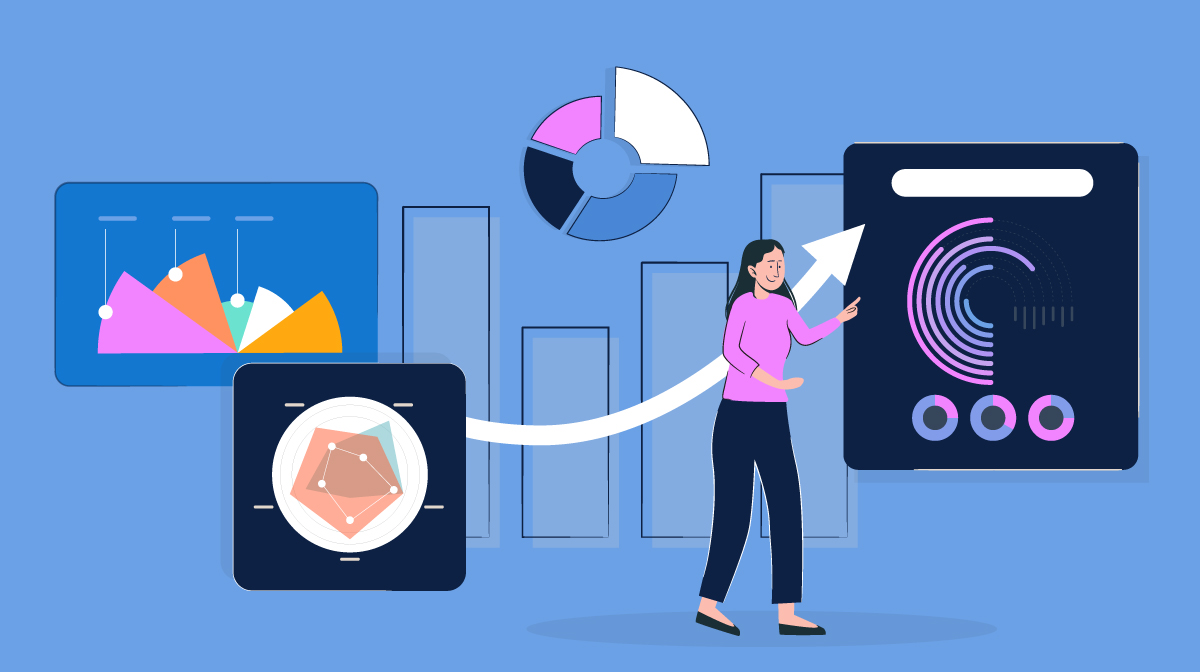

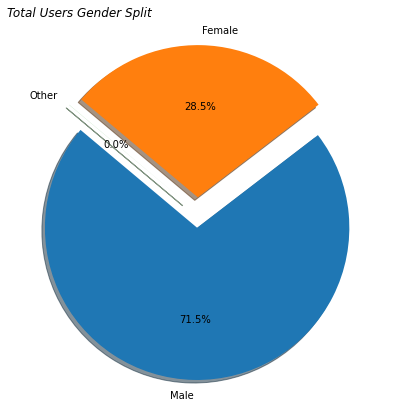

In [31]:
gender_counts = df['gender'].value_counts()

churn_label = ['Male', "Female", 'Other']
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(gender_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode)
plt.title(label="Total Users Gender Split",
          loc="left",
          fontstyle='italic')
plt.show()

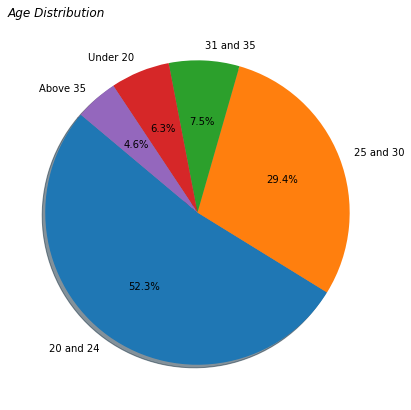

In [38]:
churn_label = ['20 and 24', "25 and 30", '31 and 35', 'Under 20', 'Above 35']
#colors = ['#23dcc2', '#fab400']
#explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(AgeBand_count, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140)
#plt.title("Age Distribution", bbox={'facecolor':'0.8', 'pad':5})
plt.title(label="Age Distribution",
          loc="left",
          fontstyle='italic')
plt.show()

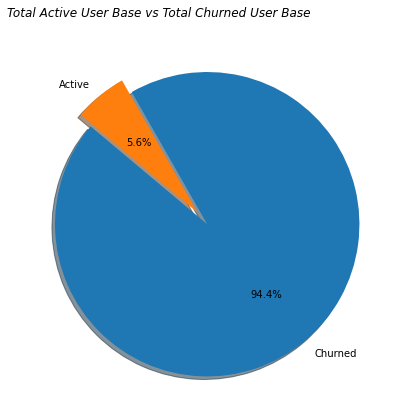

In [39]:
churn_label = ['Churned', "Active"]
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0)
fig = plt.figure(figsize =(10, 7))
plt.pie(churn_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode,)
#plt.title("Churned vs Active", bbox={'facecolor':'0.8', 'pad':5})
plt.title(label="Total Active User Base vs Total Churned User Base",
          loc="left",
          fontstyle='italic')
plt.show()

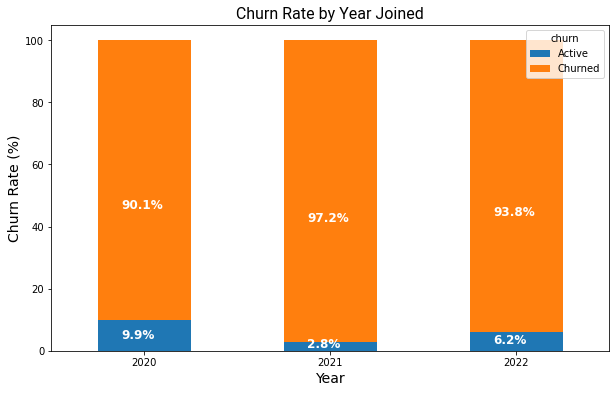

In [45]:
font1 = {'family':'roboto','color':'black','size':16}

ax = ((df.groupby(lambda x: df['joined_date'][x].year)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(10, 6))
)
plt.title("Churn Rate by Year Joined", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Year', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

- It seems most users churned in 2021
- The same year had the lowest active user base

<span style='font-family:"Roboto"'> **Average Churn Rate by Month Joined over the 3-Year period**

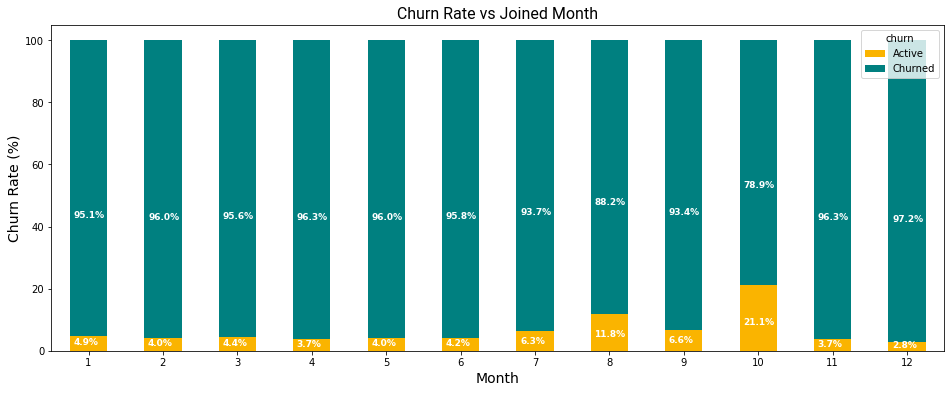

In [46]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby(lambda x: df['joined_date'][x].month)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(16, 6), color = ['#fab400', '#008080'])
)
plt.title("Churn Rate vs Joined Month", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Month', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.4*height), fontsize=9,
            color='white',
           weight = 'bold')

<span style='font-family:"Roboto"'> **Average Daily Churn Rate**

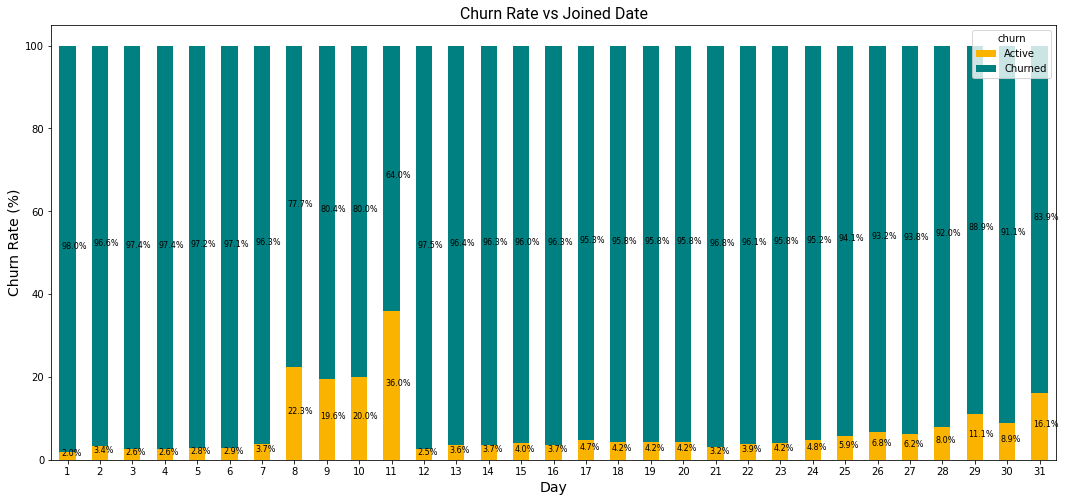

In [47]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby(lambda x: df['joined_date'][x].day)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(18, 8), color = ['#fab400', '#008080'])
)
plt.title("Churn Rate vs Joined Date", fontdict=font1)
ax.set_ylabel(f'Churn Rate (%)',size = 14 )
ax.set_xlabel('Day', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.5*height), fontsize=8,
            color='black',
           weight = 'normal')

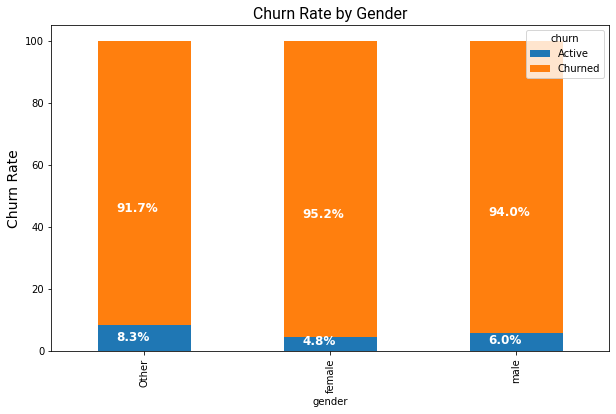

In [48]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby('gender')['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Gender", fontdict=font1)
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

Females have a higher churn rate to males

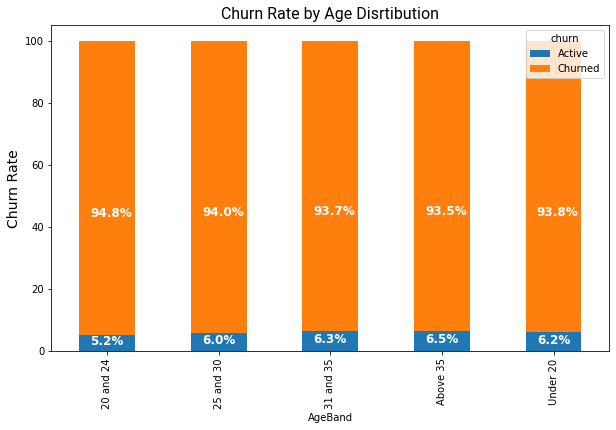

In [50]:
font1 = {'family':'roboto','color':'black','size':16}
ax = ((df.groupby('AgeBand')['churn'].value_counts(normalize=True)* 100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Age Disrtibution", fontdict=font1)
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

Users between ages 20 and 24 are more likely to churn compared to other age groups

***

### <span style='font-family:"Roboto"'>**Conclusion**

1. The total number of males outnumbers females by **43%**.
2. The age group between **20** and **24** has the highest percentage of users (**51%**), accounting for more than half of all users, but they also have the highest churn rate.
3. The year **2021** has the highest churn rate. 
    - December new users have a higher overall churn rate.
    - Users who join in August and October have a lower churn rate than users who join in other months.
    - Users who join between dates 8 and 11, as well as between dates 25 and 31, have a lower churn rate.
4. **Females** have a significantly higher churn rate than males and other genders.
5. The overall churn rate is approximately **94%**.

<div class="alert alert-block alert-success">
<b>In Progress:</b> I'll continue exploring the data further, and create a churn prediction model
</div>